# Investigating EM Cells with different datasets

In [1]:
# Numerical Python Packages
import numpy as np

# python packages
import time as t

# uproot
import uproot as ur

# Plotting packages
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm

# Import utilities
import sys
sys.path.append('/home/russbate/MLPionCollaboration/LCStudies/')
from util import deep_set_util as dsu

plotpath = '/home/russbate/MLPionCollaboration/LCStudies/segmentation/Plots/November21/'

In [2]:
events = '/data/atlas/data/allCellTruthv1/pipm/'
rootfile = ur.open(events+'user.mswiatlo.27153452.OutputStream._000001.root')
rootfile.keys()

['EventTree;1', 'CellGeo;1']

In [3]:
event_tree = rootfile["EventTree"]
event_tree.show(name_width=42,
                interpretation_width=60)

name                                       | typename                 | interpretation                                              
-------------------------------------------+--------------------------+-------------------------------------------------------------
runNumber                                  | int32_t                  | AsDtype('>i4')
eventNumber                                | int64_t                  | AsDtype('>i8')
lumiBlock                                  | int32_t                  | AsDtype('>i4')
coreFlags                                  | uint32_t                 | AsDtype('>u4')
mcEventNumber                              | int32_t                  | AsDtype('>i4')
mcChannelNumber                            | int32_t                  | AsDtype('>i4')
mcEventWeight                              | float                    | AsDtype('>f4')
nTruthPart                                 | int32_t                  | AsDtype('>i4')
G4PreCalo_n_EM                        

# Load up Data

In [25]:
t0 = t.time()
''' Assuming that these are small files we don't open them as a new mem map '''
Xraw = np.ndarray.copy(np.load('/data/atlas/rbate/Rho_X_4_files.npy', mmap_mode='r'))
Yraw = np.ndarray.copy(np.load('/data/atlas/rbate/Rho_Y_4_files.npy', mmap_mode='r'))

Energy_EM = np.ndarray.copy(Yraw[:,:,0])
Energy_nonEM = np.ndarray.copy(Yraw[:,:,1])
nz_mask = (Energy_EM + Energy_nonEM) != 0

print(Xraw.shape)
# print(Yraw.shape)
# eta_mask = Xraw[:,:,1] != 0
# phi_mask = Xraw[:,:,2] != 0
# rPerp_mask = Xraw[:,:,3] != 0
# cell_mask = np.logical_or(eta_mask, phi_mask, rPerp_mask)

(2550, 1078, 4)


### Histograms of Raw Data

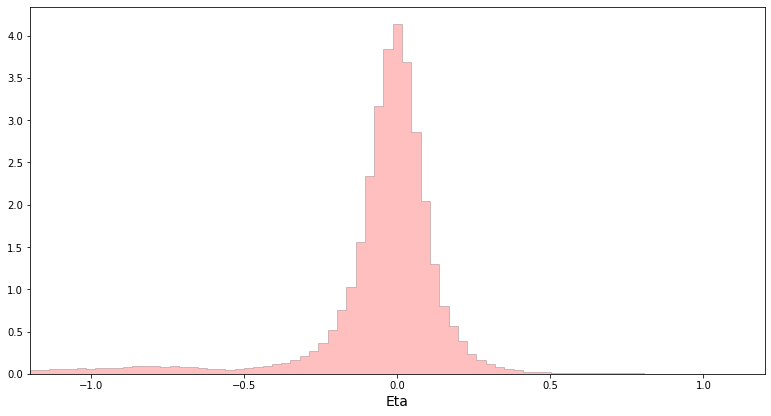

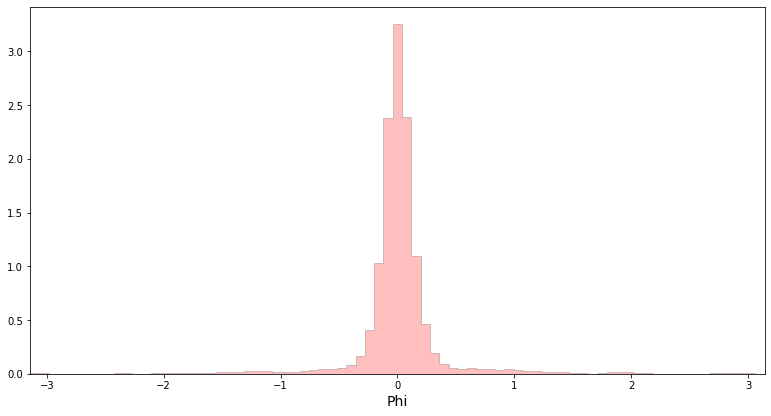

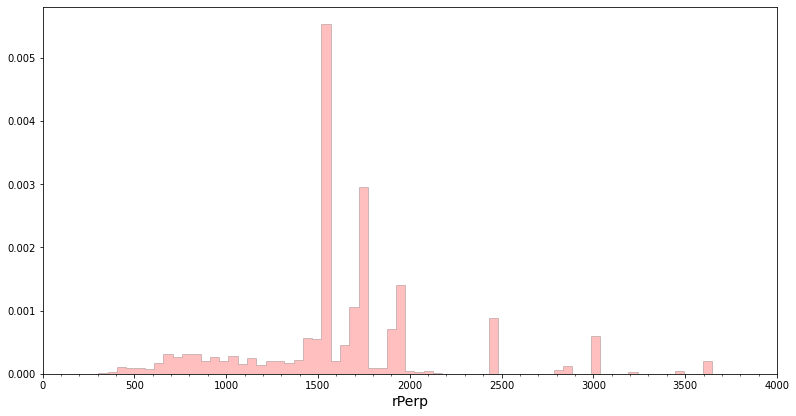

In [26]:
eta_bins = np.linspace(-1.2,1.2,80,endpoint=True)
phi_bins = np.linspace(-np.pi,np.pi,80,endpoint=True)
rPerp_bins = np.linspace(0,4000,80,endpoint=True)

# Eta histogram
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_axes([.1,.1,.85,.85])

ax1.hist(Xraw[nz_mask,1], bins=eta_bins, color='red', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
ax1.set_xlim(np.min(eta_bins), np.max(eta_bins))
ax1.set_xlabel('Eta', fontsize=14)
plt.show()

# Phi histogram
fig2 = plt.figure(figsize=(12,6))
ax2 = fig2.add_axes([.1,.1,.85,.85])

ax2.hist(Xraw[nz_mask,2], bins=phi_bins, color='red', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
ax2.set_xlim(np.min(phi_bins), np.max(phi_bins))
ax2.set_xlabel('Phi', fontsize=14)
plt.show()

# rPerp histogram
fig3 = plt.figure(figsize=(12,6))
ax3 = fig3.add_axes([.1,.1,.85,.85])

ax3.hist(Xraw[nz_mask,3], bins=rPerp_bins, color='red', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(100))
ax3.set_xlim(np.min(rPerp_bins), np.max(rPerp_bins))
ax3.set_xlabel('rPerp', fontsize=14)
plt.show()

### Convert [Eta, Phi, rPerp] to [X,Y,Z]

In [27]:
X = np.zeros(Xraw.shape)
Y = np.empty(Yraw.shape)
X[nz_mask,:] = np.ndarray.copy(Xraw[nz_mask,:])
Y[nz_mask,:] = np.ndarray.copy(Yraw[nz_mask,:])

## COORDINATE CHANGE
X[:,:,1:4] = dsu.to_xyz(coords=X[:,:,1:4], mask=nz_mask)

# ## ENERGY ##
# E_mask = X[:,:,0] != 0
# X[E_mask,0] = np.log(X[E_mask,0])

### Histograms of Cartesian

<Figure size 432x288 with 0 Axes>

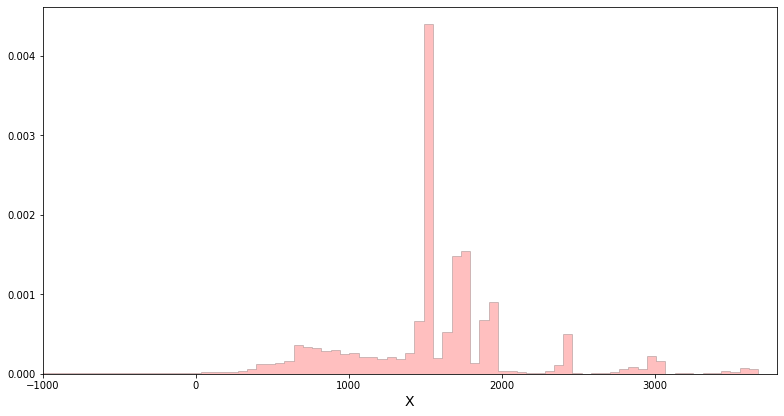

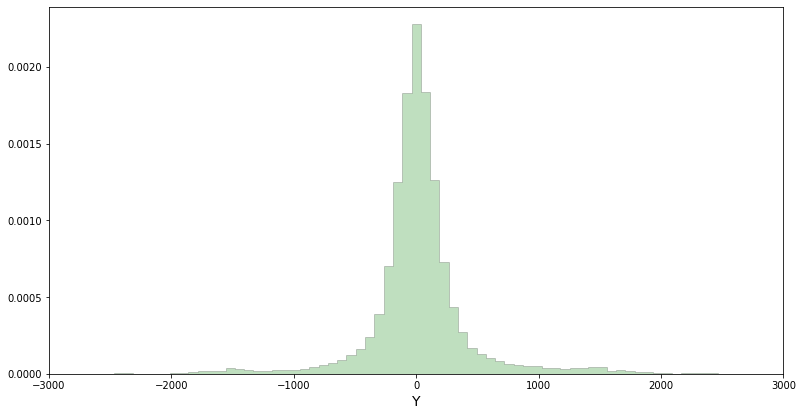

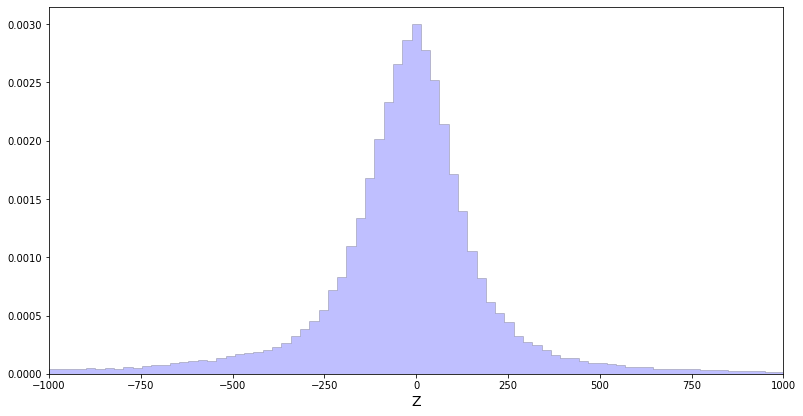

In [28]:
plt.cla();plt.clf()
xmask = X[:,:,1] != 0
ymask = X[:,:,2] != 0
zmask = np.logical_or(xmask, ymask)

xbins = np.linspace(-1000,3800,80,endpoint=True)
ybins = np.linspace(-3000,3000,80,endpoint=True)
zbins = np.linspace(-1000,1000,80,endpoint=True)

# X histogram
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_axes([.1,.1,.85,.85])

ax1.hist(X[xmask,1], bins=xbins, color='red', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
ax1.set_xlim(np.min(xbins), np.max(xbins))
ax1.set_xlabel('X', fontsize=14)
plt.show()

# Y histogram
fig2 = plt.figure(figsize=(12,6))
ax2 = fig2.add_axes([.1,.1,.85,.85])

ax2.hist(X[ymask,2], bins=ybins, color='green', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='Y', density=True)
ax2.set_xlim(np.min(ybins), np.max(ybins))
ax2.set_xlabel('Y', fontsize=14)
plt.show()

# Z histogram
fig3 = plt.figure(figsize=(12,6))
ax3 = fig3.add_axes([.1,.1,.85,.85])

ax3.hist(X[zmask,3], bins=zbins, color='blue', alpha=.25, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='Z', density=True)
ax3.set_xlim(np.min(zbins), np.max(zbins))
ax3.set_xlabel('Z', fontsize=14)
plt.show()

## Set up Target

In [29]:
target = np.zeros(Energy_EM.shape)
target[nz_mask] = Energy_EM[nz_mask]/(Energy_EM[nz_mask]+Energy_nonEM[nz_mask])

#### Show Target
 - [ ] Add these to the slides later

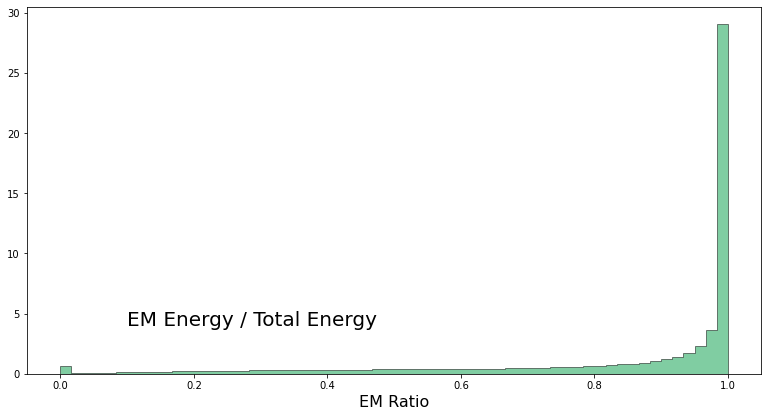

In [31]:
figRatio = plt.figure(figsize=(12,6))
ax = figRatio.add_axes([.1,.1,.85,.85])

ax.hist(target[nz_mask], bins=60, color='mediumseagreen', alpha=.65, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=True)
# ax.set_ylim(0,5)
ax.set_xlabel('EM Ratio', fontsize=16)
ax.text(x=.1, y=4, s='EM Energy / Total Energy', fontsize=20)
plt.savefig('Plots/EM_Energy_to_total_Rho_4_files2.png', format='png')
plt.show()

## Look at energy distributions

In [10]:
event_energies = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    event_energies[i] = np.sum(X[i,:,0])

[0.         0.19489493 0.38978987 0.5846848  0.77957974 0.97447467
 1.16936961 1.36426454 1.55915948 1.75405441 1.94894935 2.14384428
 2.33873922 2.53363415 2.72852909 2.92342402 3.11831896 3.31321389
 3.50810883 3.70300376 3.8978987  4.09279363 4.28768857 4.4825835
 4.67747844 4.87237337 5.06726831 5.26216324 5.45705818 5.65195311
 5.84684805 6.04174298 6.23663792 6.43153285 6.62642779 6.82132272
 7.01621765 7.21111259 7.40600752 7.60090246]
(2550,)


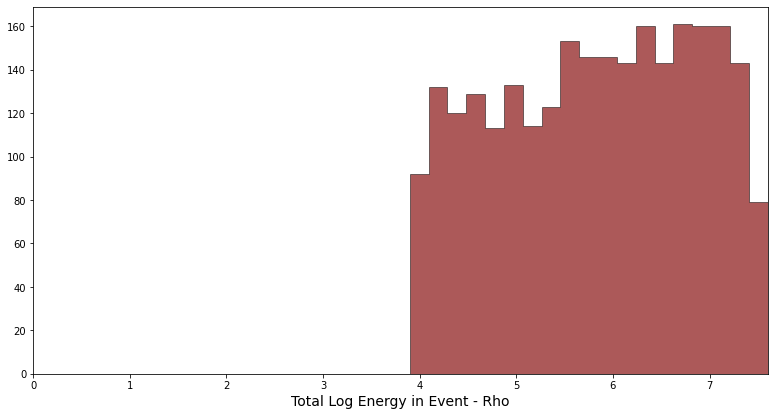

In [14]:
figE = plt.figure(figsize=(12,6))
ax = figE.add_axes([.1,.1,.85,.85])

Ebins = np.linspace(0,np.log(2000),40,endpoint=True)
print(Ebins)
print(event_energies.shape)

ax.hist(np.log(event_energies), bins=Ebins, color='maroon', alpha=.65, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=False)
ax.set_xlim(np.min(Ebins), np.max(Ebins))
ax.set_xlabel('Total Log Energy in Event - Rho', fontsize=14)
# plt.savefig(plotpath+'Energy_Dist_Rho_4_files.png', format='png')
plt.show()

### Choose Events and Create Dataset

In [151]:
energy_ranges = np.empty( (len(Ebins), 2) )
energy_dict = dict()
bin_indices = np.empty(X.shape[0])

for i in range(len(Ebins)-1):
    energy_ranges[i,0] = np.exp(Ebins[i])
    energy_ranges[i,1] = np.exp(Ebins[i+1])
    energy_dict[i] = []
    
# energy_dict = {k: [] for k in range(Ebins-1)}

for i in range(X.shape[0]):

    # get energy and find where it fits
    thisE = np.sum(X[i,:,0])
    _gt = thisE > energy_ranges[:,0]
    _lt = thisE < energy_ranges[:,1]
    _eq = np.logical_and(_gt, _lt)
    _idx = np.argmax(_eq)
    
    # keep track of where the energy is getting saved
    bin_indices[i] = _idx
    
    # number of active cells in the event
    num = np.count_nonzero(nz_mask[i,:])
    
    # dictionary of relevant information
    energy_dict[_idx].append((thisE, num, i))

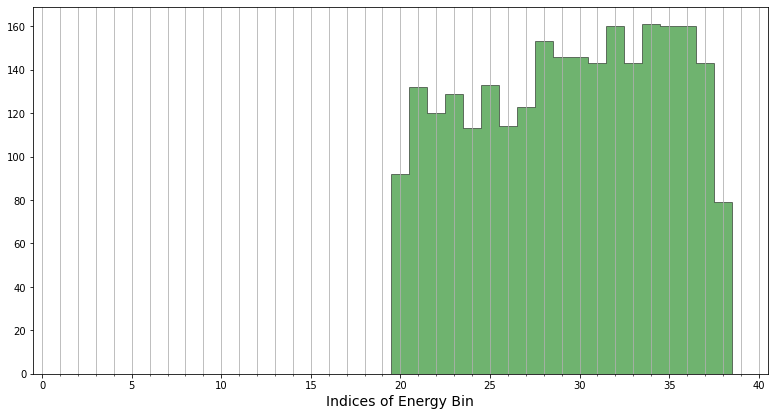

In [152]:
figBins = plt.figure(figsize=(12,6))
ax = figBins.add_axes([.1,.1,.85,.85])

bins = np.arange(-.5, len(Ebins)+1, 1)

ax.hist(bin_indices, bins=bins, color='forestgreen', alpha=.65, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=False)
ax.set_xlim(np.min(bins), np.max(bins))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.grid(b=True, which='both', axis='x')
ax.set_xlabel('Indices of Energy Bin', fontsize=14)
plt.show()

In [153]:
some_values = energy_dict[27]
cell_numbers = np.empty(len(some_values))

for j in range(len(some_values)):
    thisE, num, index = some_values[j]
    print(str(j)+': '+'{:.2f}'.format(thisE)+' GeV - '+'{:04d}'.format(num)+' cells'\
         ' - X index: '+str(index))
    
    cell_numbers[j] = num

0: 231.78 GeV - 0050 cells - X index: 10
1: 225.65 GeV - 0182 cells - X index: 26
2: 201.13 GeV - 0181 cells - X index: 37
3: 210.48 GeV - 0130 cells - X index: 42
4: 197.87 GeV - 0132 cells - X index: 66
5: 211.45 GeV - 0191 cells - X index: 76
6: 229.74 GeV - 0211 cells - X index: 90
7: 230.91 GeV - 0124 cells - X index: 113
8: 203.81 GeV - 0153 cells - X index: 122
9: 214.17 GeV - 0028 cells - X index: 130
10: 197.95 GeV - 0299 cells - X index: 158
11: 227.94 GeV - 0162 cells - X index: 177
12: 199.58 GeV - 0040 cells - X index: 206
13: 199.13 GeV - 0345 cells - X index: 233
14: 199.69 GeV - 0216 cells - X index: 241
15: 206.39 GeV - 0065 cells - X index: 272
16: 196.28 GeV - 0150 cells - X index: 285
17: 201.14 GeV - 0023 cells - X index: 288
18: 206.13 GeV - 0288 cells - X index: 337
19: 210.66 GeV - 0148 cells - X index: 340
20: 194.93 GeV - 0184 cells - X index: 348
21: 207.26 GeV - 0248 cells - X index: 386
22: 210.43 GeV - 0193 cells - X index: 427
23: 219.63 GeV - 0143 cells 

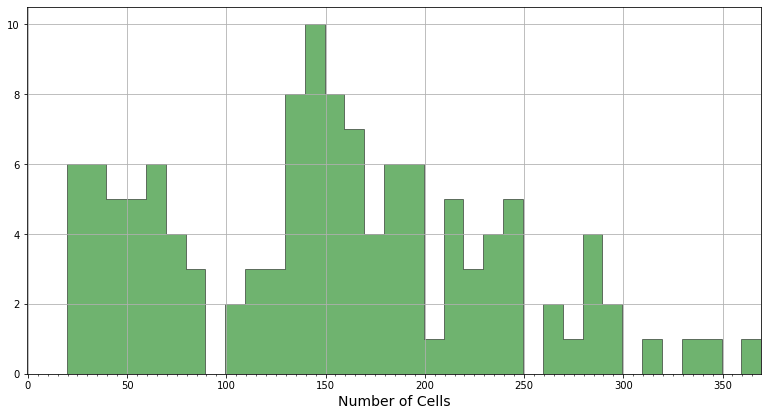

In [156]:
figCells = plt.figure(figsize=(12,6))
ax = figCells.add_axes([.1,.1,.85,.85])

nCellBins = np.arange(-.5, np.max(cell_numbers)+10, 10)

ax.hist(cell_numbers, bins=nCellBins, color='forestgreen', alpha=.65, edgecolor='black', linewidth=.75,
        histtype='stepfilled', label='X', density=False)
ax.set_xlim(np.min(nCellBins), np.max(nCellBins))
ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_locator(plt.MultipleLocator(50))
plt.grid(b=True, which='major', axis='x')
plt.grid(b=True, which='major', axis='y')
ax.set_xlabel('Number of Cells', fontsize=14)
# plt.savefig(plotpath+'Cell_Number_Distribution_Rho_4_files.png', format='png')
plt.show()

# Making 3D Plots
Now that events are "normalized" in the sense we can compare similar events with similar energies and cell numbers and compare their showers 

Now we simply choose an event from the index

### Declare Index Number Here!

In [201]:
visual_event = 2002

#### Solve for the centroid of the event

In [202]:
EM_centroid, nonEM_centroid = dsu.find_centroid(X[visual_event,:,1:4], Y[visual_event])
print(EM_centroid)
print(nonEM_centroid)

[2425.35656253   -4.33172682   13.37457886]
[2568.12314276    2.6684395     7.47498129]


#### Create Lines

In [203]:
nEvt_cells = np.count_nonzero(nz_mask[visual_event,:])
print(nEvt_cells, 'cells in event')
EM_lines = []
nonEM_lines = []

for i in range(nEvt_cells):
    
    emline = np.empty((2,3))
    emline[0,:] = X[visual_event,i,1:4]
    emline[1,:] = EM_centroid
    EM_lines.append(emline)
    
    nonemline = np.empty((2,3))
    nonemline[0,:] = X[visual_event,i,1:4]
    nonemline[1,:] = nonEM_centroid
    nonEM_lines.append(nonemline)

249 cells in event


### Make Plots
To Do:
 - [ ] make this a function

(249, 3)


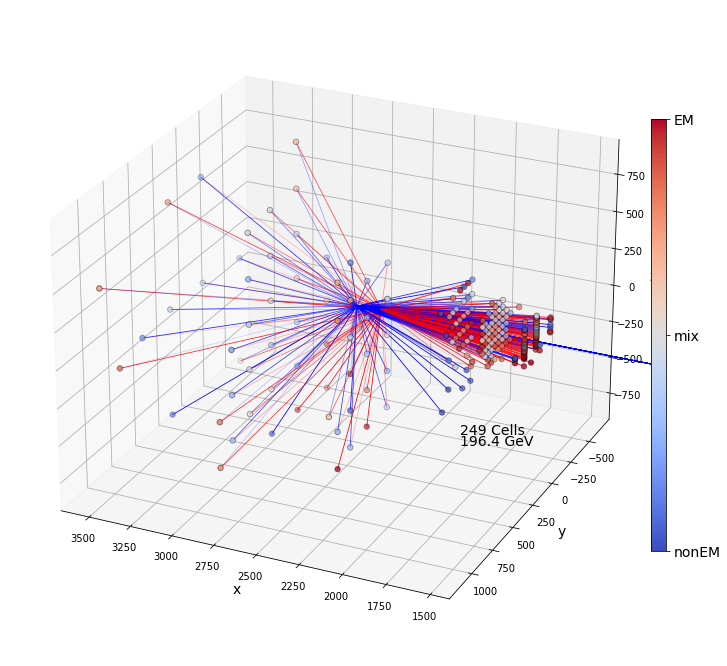

In [205]:
# %matplotlib widget

cluster_points = X[visual_event,nz_mask[visual_event,:],1:4]

print(cluster_points.shape)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(projection='3d')
ax.view_init(elev=25, azim=115)

scatterplot = ax.scatter(cluster_points[:,0], cluster_points[:,1], cluster_points[:,2],
           c=target[visual_event, nz_mask[visual_event,:]],
          s=30, edgecolor=(0,0,0,.5), cmap=cm.coolwarm, vmin=0, vmax=1)

for i in range(nEvt_cells):
    ratio = target[visual_event, i]
    if np.isnan(ratio):
        ratio = 0
    ax.plot(EM_lines[i][:,0], EM_lines[i][:,1], EM_lines[i][:,2], color='red', linewidth=.8,
           alpha=ratio)
    ax.plot(nonEM_lines[i][:,0], nonEM_lines[i][:,1], nonEM_lines[i][:,2], color='blue', linewidth=.8,
           alpha=1-ratio)

# ax.set_xlim(1.2*np.min(cluster_points[:,0]), 1.2*np.max(cluster_points[:,0]))
# ax.set_ylim(1.0*np.min(cluster_points[:,1]), 1.0*np.max(cluster_points[:,1]))
# ax.set_zlim(1.0*np.min(cluster_points[:,2]), 1.0*np.max(cluster_points[:,2]))
ax.set_xlim(np.min(cluster_points[:,0]), np.max(cluster_points[:,0]))
ax.set_ylim(np.min(cluster_points[:,1]), np.max(cluster_points[:,1]))
ax.set_zlim(np.min(cluster_points[:,2]), np.max(cluster_points[:,2]))
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)

## COLORBAR ##
cb_ax = fig.add_axes([.88, 0.25, 0.018, 0.5])
cbar = fig.colorbar(scatterplot, cax=cb_ax)

# set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(-.5, 1.1, 0.5))
cbar.set_ticklabels(['filler', 'nonEM', 'mix', 'EM'])
cbar.ax.tick_params(labelsize=14)

c_eng = np.sum(X[visual_event,nz_mask[visual_event,:],0])
ax.text(x=1800, y=300, z=-525, s=str(nEvt_cells)+' Cells', fontsize=14)
ax.text(x=1800, y=300, z=-600, s='{:4.1f}'.format(c_eng)+' GeV', fontsize=14)

plt.savefig('/home/russbate/MLPionCollaboration/LCStudies/segmentation/Plots/November21/'\
            +'Rho_mpl3d_centroid_'+str(visual_event)+'.png', format='png')

plt.show()